
# Data Visualization with Matplotlib - Exercises

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้

## Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.arange(0,100)
y = x*2
z = x**2
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

## Exercise 1


Text(0.5, 0, 'x')

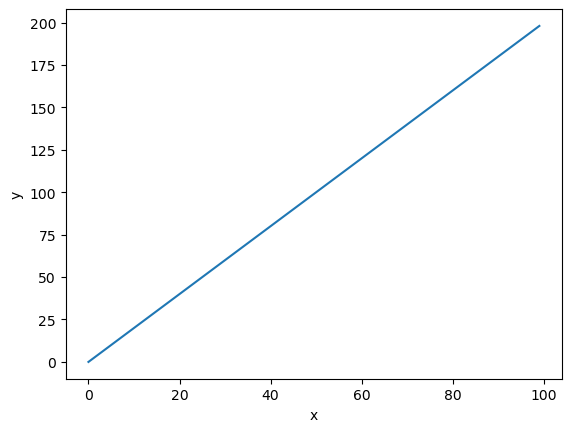

In [17]:
plt.plot(x, y)
plt.ylabel('y')
plt.xlabel('x')

Text(0, 0.5, 'Y')

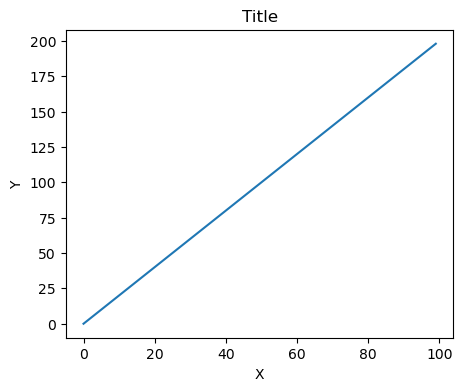

## Exercise 2

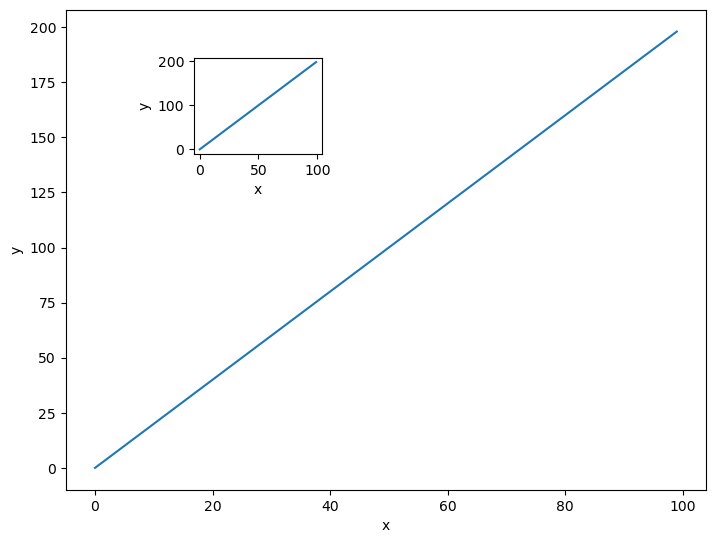

In [27]:
fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.plot(x,y)

axes2 = fig.add_axes([0.2,0.7,0.2,0.2])
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.plot(x,y)

Text(0, 0.5, 'Y')

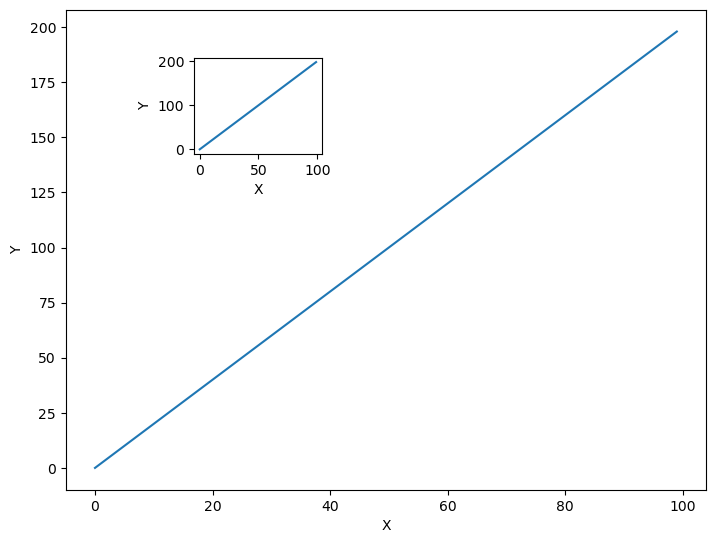

## Exercise 3



**ใช้  arrays x, y และ z เพื่อทำการ plot บนแกนที่สร้างจากข้อที่แล้ว  (Notice อย่าลืมกำหนด  x - limits และ y - limits )**

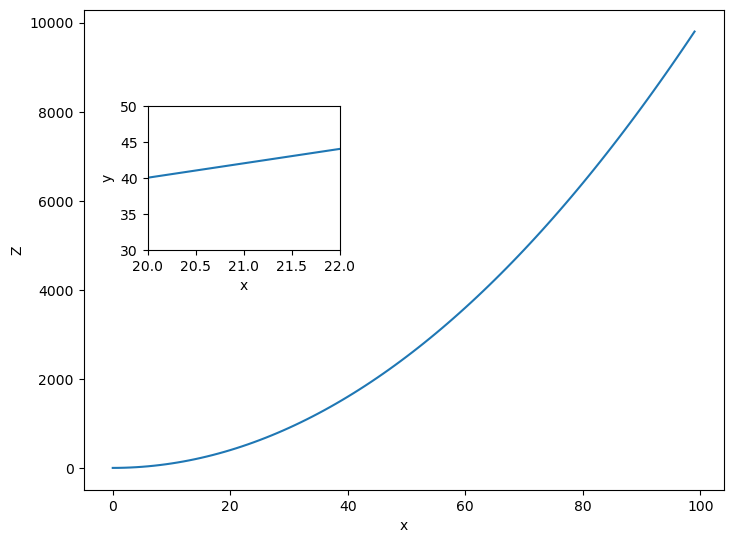

In [57]:
fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
axes1.set_xlabel('x')
axes1.set_ylabel('Z')
axes1.plot(x, z)

axes2 = fig.add_axes([0.1,0.5,0.3,0.3])
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_ylim(30,50)
axes2.set_xlim(20,22)
axes2.set_yticks([30,35,40,45,50])
axes2.set_xticks([20.0,20.5,21.0,21.5,22.0])
axes2.plot(x, y)

(30.0, 50.0)

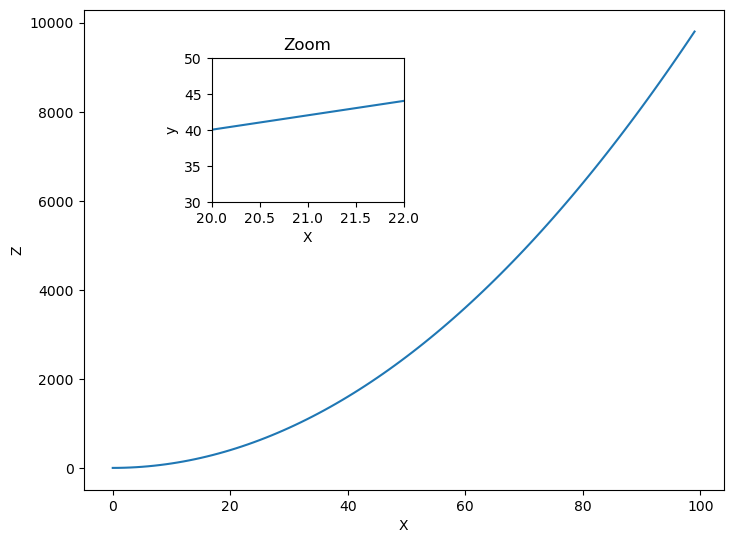

## Exercise 4

**จงใช้คำสั่ง plt.subplots(nrows=1, ncols=2)**

**จากนั้นให้ทำการ plot (x,y) และ plot (x,z) บนแกน axes  และให้ใช้งานคำสั่ง linewidth and style เพื่อตกแต่งเส้นของกราฟ**

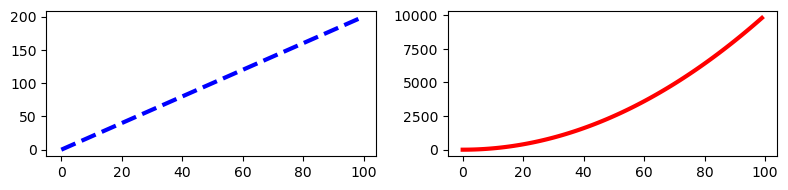

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
axes[0].set_yticks(np.arange(0,201,50))
axes[0].set_xticks(np.arange(0,101,20))
axes[0].plot(x,y, ls='--', color='b', lw=(3))
axes[1].set_xticks(np.arange(0,101,20))
axes[1].plot(x,z, color='red', lw=3)
fig.tight_layout()


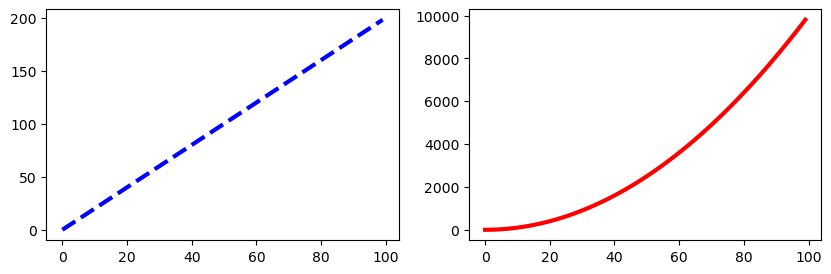

## Exercise 5

In [143]:
df.head(3)

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## จงแสดงกราฟรายได้ของทุกปี

In [147]:
df1 = df.groupby('Year')['Profit'].sum()
a = df1.index
b = df1

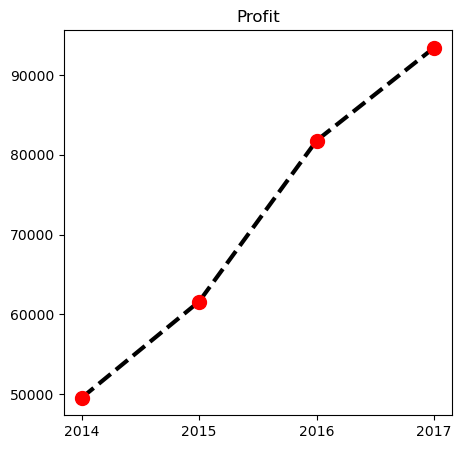

In [171]:
plt.figure(figsize=(5,5))
plt.title('Profit')
plt.plot(a,b, ls='--', color='black' ,lw=3, marker='o', ms=10, mfc='red', mec='red')
plt.xticks(np.arange(2014,2018))
plt.show()

Text(0.5, 1.0, 'Profit')

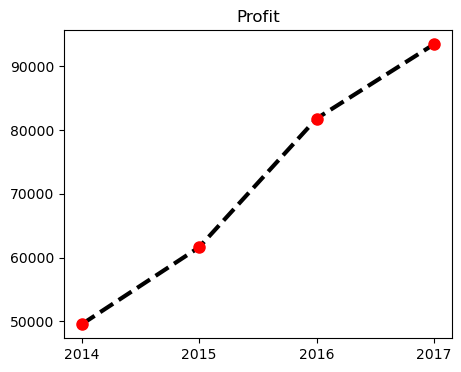

#### โค้ดต่อไปนี้ใช้ในสองข้อสุดท้าย

In [173]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [175]:
df[ df['Category'] == 'Furniture' ].groupby('Year').sum()['Profit']

Year
2014    5457.7255
2015    3015.2029
2016    6959.9531
2017    3018.3913
Name: Profit, dtype: float64

##### Dictionary of Category

In [179]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']

## จงแสดงกราฟรายได้ของแต่ละ Category ในแต่ละปีในกราฟเดียว 

In [228]:
arr_df

{'Furniture': Year
 2014    5457.7255
 2015    3015.2029
 2016    6959.9531
 2017    3018.3913
 Name: Profit, dtype: float64,
 'Office Supplies': Year
 2014    22593.4161
 2015    25099.5338
 2016    35061.2292
 2017    39736.6217
 Name: Profit, dtype: float64,
 'Technology': Year
 2014    21492.8325
 2015    33503.8670
 2016    39773.9920
 2017    50684.2566
 Name: Profit, dtype: float64}

In [242]:
arr_df['Furniture'].index

Index([2014, 2015, 2016, 2017], dtype='int64', name='Year')

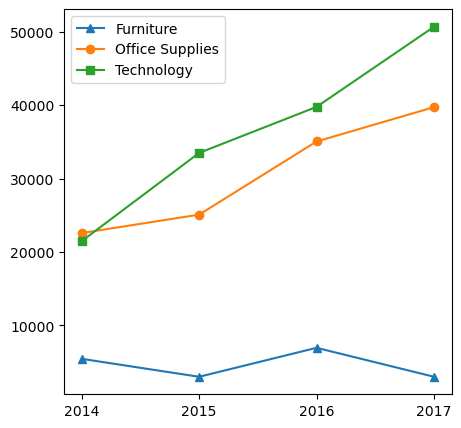

In [268]:
plt.figure(figsize=(5,5))
plt.plot(arr_df['Furniture'].index, arr_df['Furniture'], marker='^', label='Furniture')
plt.plot(arr_df['Office Supplies'].index, arr_df['Office Supplies'], marker='o', label='Office Supplies')
plt.plot(arr_df['Technology'].index, arr_df['Technology'], marker='s', label='Technology')
plt.xticks(np.arange(2014, 2018))
plt.yticks(np.arange(10000,50001, 10000))
plt.legend(loc='upper left')
plt.show()

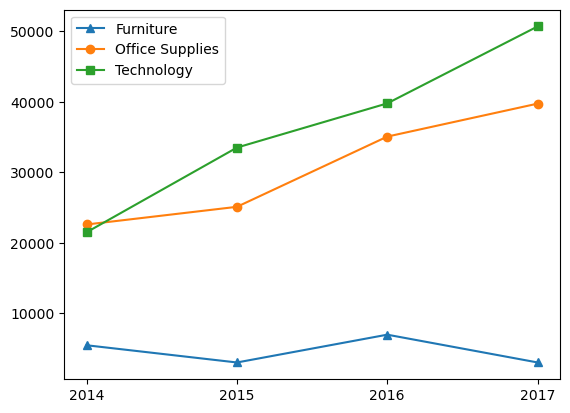


## จงแสดงกราฟรายได้ของแต่ละ Category ในแต่ละปี แบบแยกกราฟ

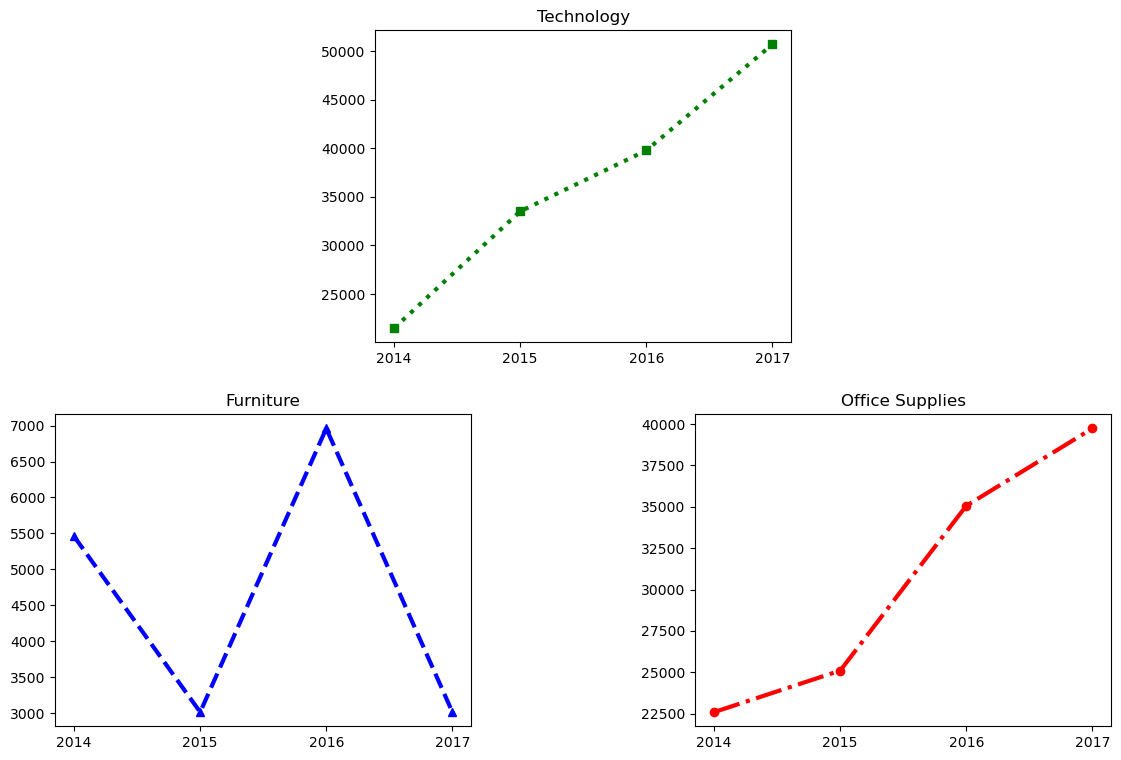

In [315]:
fig = plt.figure()
axes1 = fig.add_axes([0,0,0.65,0.65])
axes1.plot(arr_df['Furniture'].index, arr_df['Furniture'], marker='^', label='Furniture', color='blue', ls='--', lw=3)
axes1.set_title('Furniture')
axes1.set_xticks(np.arange(2014,2018))

axes2 = fig.add_axes([0.5,0.8,0.65,0.65])#ตำแหน่ง ตพชำแหน่ง ความขาวไปทางขวา ความยาวไปข้างบน
axes2.plot(arr_df['Technology'].index, arr_df['Technology'], marker='s', label='Technology', color='green', ls='dotted', lw=3)
axes2.set_title('Technology')
axes2.set_xticks(np.arange(2014,2018))

axes3 = fig.add_axes([1,0,0.65,0.65])#ตำแหน่ง ตพชำแหน่ง ความขาวไปทางขวา ความยาวไปข้างบน
axes3.plot(arr_df['Office Supplies'].index, arr_df['Office Supplies'], marker='o', label='Office Supplies', color='red', ls='-.', lw=3)
axes3.set_title('Office Supplies')
axes3.set_xticks(np.arange(2014,2018))


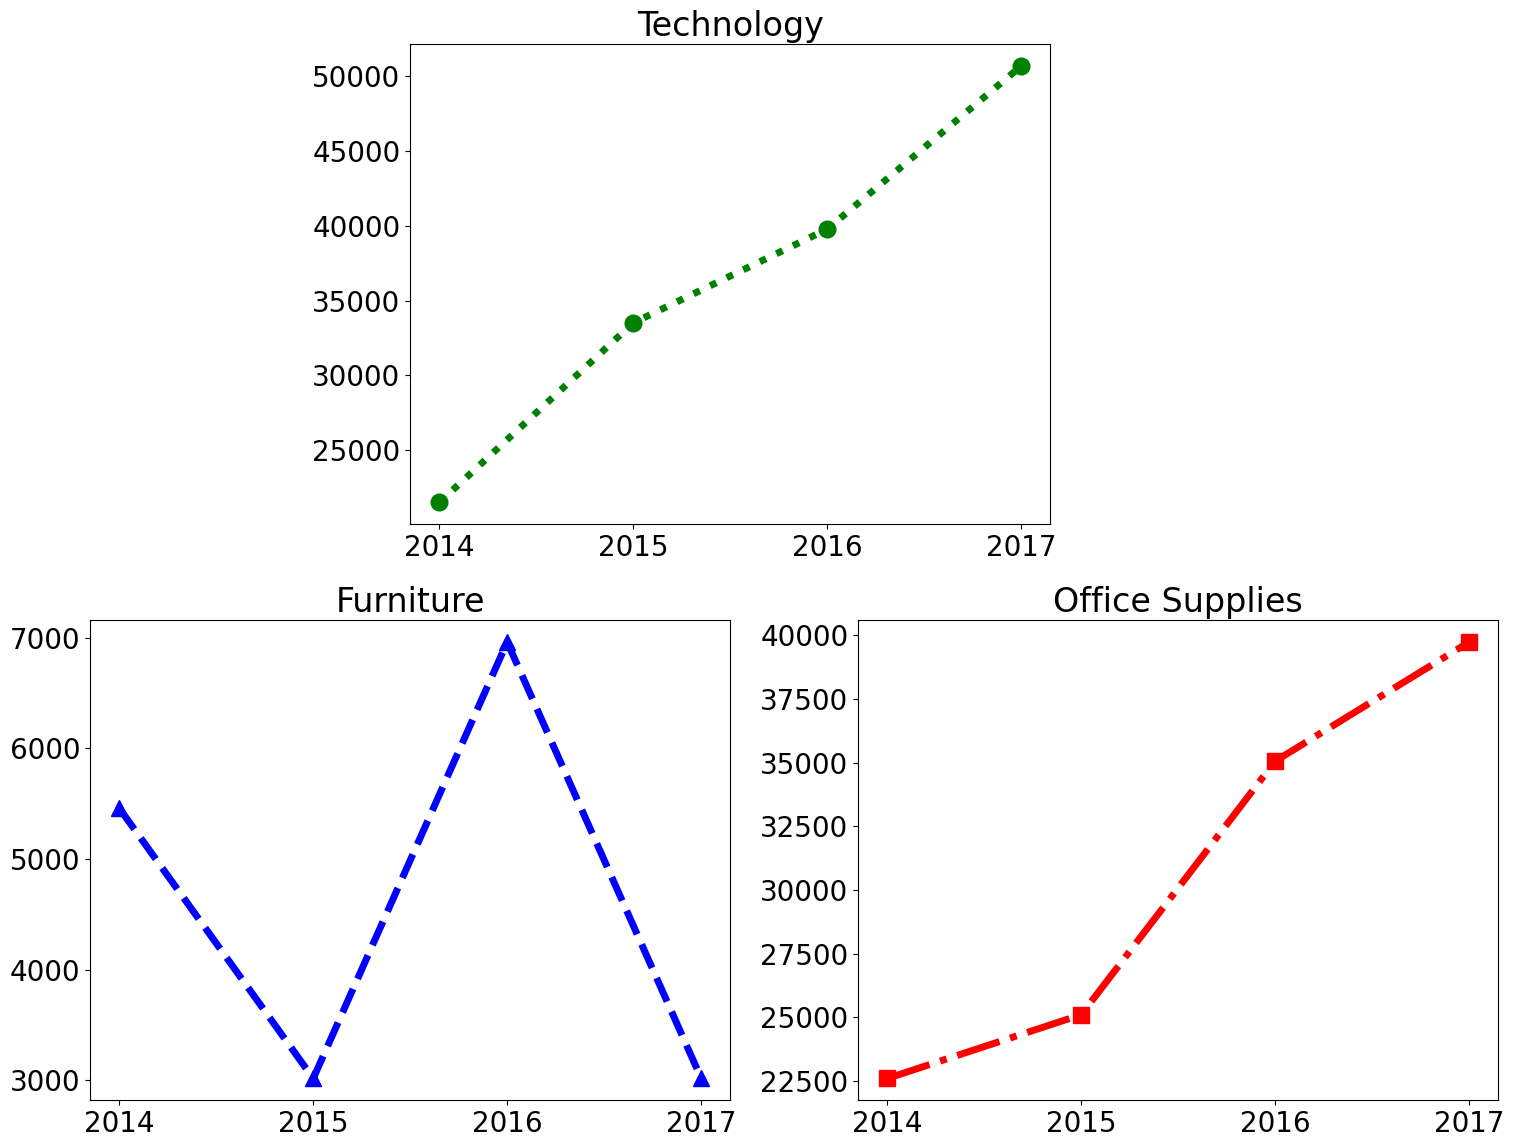